In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, skewnorm

In [2]:
def sigmoid(arr: np.ndarray, pow: float = 1, shift=0) -> np.ndarray:
    # apply powered sigmoid to unskew data
    return 1 / (1 + np.exp(-arr)) ** pow

def anti_sigmoid(arr: np.ndarray, pow: float = 1.) -> np.ndarray:
    # reverse powered sigmoid to reskew data
    return -np.log(arr ** (- 1 / pow) - 1)

# left-skewed

0.060861992686894635


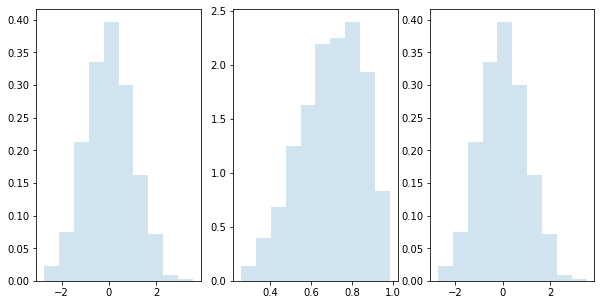

In [171]:
skew_param = 0
r = skewnorm.rvs(skew_param, size=1000)
print(skew(r))

# pow = 1 / np.log(skew(r) + 10)
pow = sigmoid(-skew(r))
sig = sigmoid(r, pow)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax[1].hist(sig, density=True, histtype='stepfilled', alpha=0.2)
ax[2].hist(anti_sigmoid(sig, pow), density=True, histtype='stepfilled', alpha=0.2)
plt.show()

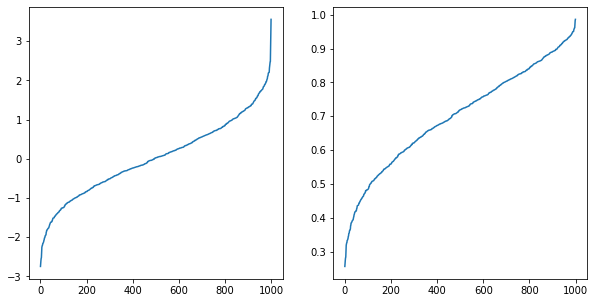

In [172]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.sort(r))
ax[1].plot(np.sort(sigmoid(r, pow)))
plt.show()

# right-skewed

In [ ]:
r_rev = r.max() - r
pow = 1 / np.log(skew(r_rev) + 2)
sig = sigmoid(r_rev, pow)

fig, ax = plt.subplots(1, 3, figsize=(10, 5))
ax[0].hist(r_rev, density=True, histtype='stepfilled', alpha=0.2)
ax[1].hist(sig, density=True, histtype='stepfilled', alpha=0.2)
ax[2].hist(anti_sigmoid(sig, pow), density=True, histtype='stepfilled', alpha=0.2)

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(np.sort(r_rev))
ax[1].plot(np.sort(sigmoid(r_rev, pow)))
plt.show()

In [ ]:
skew(r_rev)

# Other

In [147]:
skew(skewnorm.rvs(0, size=100000))

0.0052550930069873774

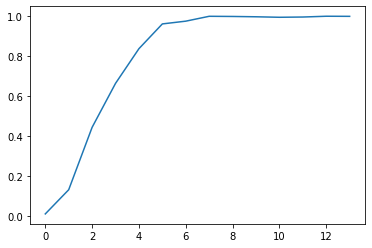

In [148]:
skew_params = [0, 1, 2, 3, 5, 10, 20, 50, 100, 200, 500, 1000, 10000, 100000]
skews = [skew(skewnorm.rvs(skew_param, size=100000)) for skew_param in skew_params]
plt.plot(skews)

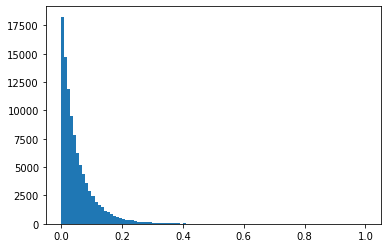

2.757624640385718


In [3]:
pareto = np.random.pareto(10, size=100000)
pareto = pareto / pareto.max()
plt.hist(pareto, bins=100)
plt.show()
print(skew(pareto))

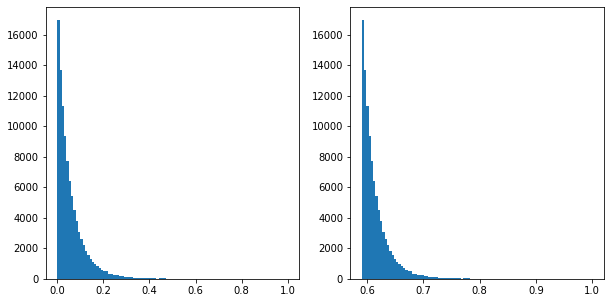

In [209]:
frac = 0.2
pareto_flat = pareto.copy()
for i in range(4):
    d = 1 - pareto_flat
    pareto_flat += d * frac

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(pareto, bins=100)
ax[1].hist(pareto_flat, bins=100)
plt.show()

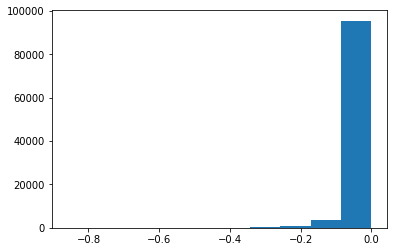

In [211]:
x = np.linspace(0, 1, len(pareto))
plt.hist(-(x - 1) ** 2 * pareto)
plt.show()

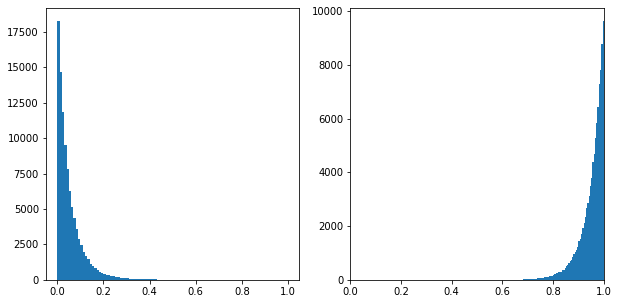

In [6]:
pareto_flat = 1 / (pareto + 1)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(pareto, bins=100)
ax[1].hist(pareto_flat, bins=100)
ax[1].set_xlim(0, 1)
plt.show()